# Customizing Plot Legends

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

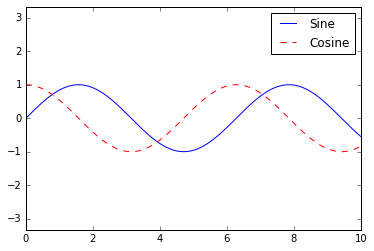

In [5]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

- To specify the location and turn off the frame:

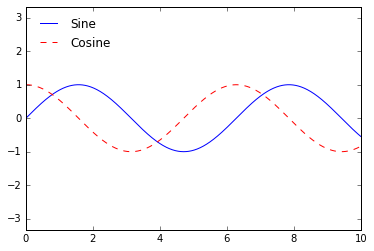

In [6]:
ax.legend(loc='upper left', frameon=False)
fig

- We can use the ``ncol`` command to specify the number of columns in the legend:

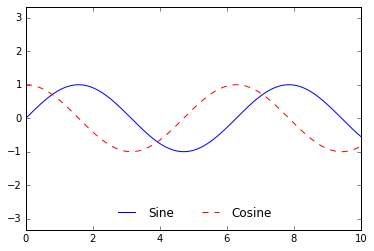

In [7]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

- We can use a rounded box (``fancybox``) or add a shadow, change the transparency (alpha value) of the frame, or change the padding around the text:

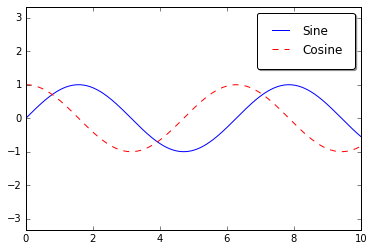

In [8]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

### Choosing Elements for the Legend

- Legends include all labeled elements by default.
- Adjust which elements and labels appear by using the objects returned by plot commands.
- ``plt.plot()`` can create multiple lines at once & returns a list of created line instances. Passing any of these to ``plt.legend()`` will tell it which to identify, along with the labels we'd like to specify:

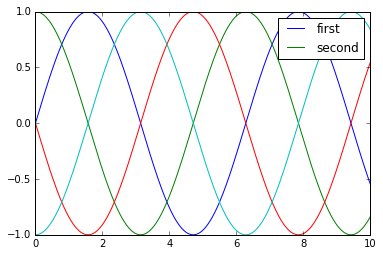

In [9]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

- It's generally easier to use the first method, applying labels to the plot elements you'd like to show on the legend:

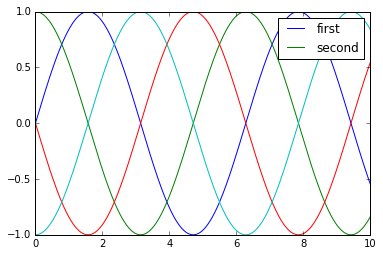

In [10]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

### Legend for Datapoint Sizes

- Some datapoint sizes are used to describe a feature & need a legend reflecting this.
- This example uses the size of points to indicate populations of California cities.

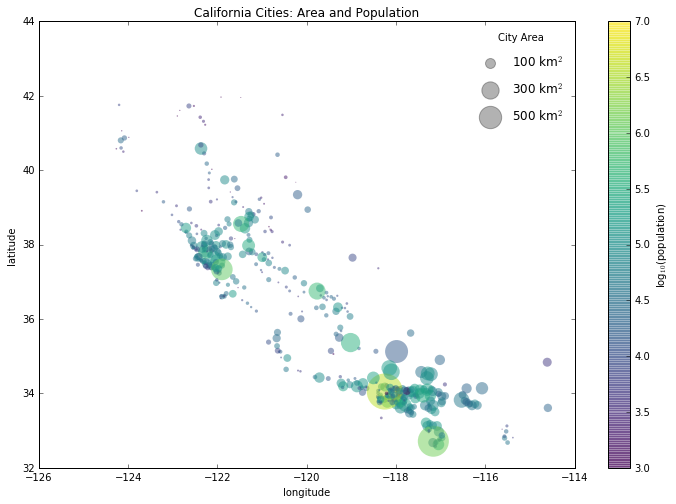

In [12]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
fig = plt.figure(figsize=(12,8))

plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + ' km$^2$')
    
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

- The legend always references an object on the plot, so if we'd like to display a particular shape we need to plot it.
- In this case, the objects we want (gray circles) are not on the plot, so we fake them by plotting empty lists.
- Notice that the legend only lists plot elements that have a label specified.
- By plotting empty lists, we create labeled plot objects which are picked up by the legend, and now our legend tells us some useful information.
- Note that for geographic data, graphing state boundaries or other map-specific elements would help. Consider Matplotlib's Basemap addon toolkit.

### Multiple Legends

- Matplotlib does not support multiple legends. If you try to create a second legend using ``plt.legend()`` or ``ax.legend()``, it will simply override the first one.
- We can work around this by creating a new legend artist from scratch, and then using the lower-level ``ax.add_artist()`` method to manually add it to the plot.

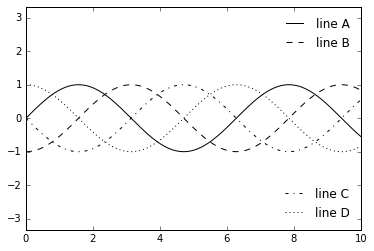

In [15]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);